## Raster Data

In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
sys.path.insert(0, os.path.abspath('../../'))
from skmap.data import toy
from skmap.io import process
import importlib
import time
importlib.reload(process)
from tqdm.notebook import tqdm

n_it = 3
n_n_t = 40
n_n_s = 2200
spars_vec = [0.01, 0.05, 0.10, 0.5, 0.75]
n_spars = len(spars_vec)
time_grid_sparse = np.empty((n_n_t, n_n_s, n_spars, n_it))
time_grid_dense = np.empty((n_n_t, n_n_s, n_spars, n_it))
time_grid_fft = np.empty((n_n_t, n_n_s, n_spars, n_it))
n_t_vec = range(n_n_t)
n_s_vec = range(n_n_s)

for k in range(n_it):
    print(f"##### Iteration {k} #####")
    for j, spars in enumerate(spars_vec):
        print(f"Sparsity {spars}")
        for n_t in tqdm(n_t_vec):
            st_t = time.time()
            for n_s in n_s_vec:
                data = np.random.rand(1,n_t+1,n_s+1)
                n_f = np.ceil(spars*n_s).astype(int)
                n_p = np.ceil(spars*n_s).astype(int)
                w_f = np.random.rand(n_f)
                w_p = np.random.rand(n_p)
                st = time.time()
                sircleTransformer = process.SircleTransformer(w_0=1, w_f=w_f, w_p=w_p, backend="dense")
                out_dense = sircleTransformer._run(data)
                time_grid_dense[n_t, n_s, j, k] = time.time()-st
                st = time.time()
                sircleTransformer = process.SircleTransformer(w_0=1, w_f=w_f, w_p=w_p, backend="sparse")
                out_sparse = sircleTransformer._run(data)
                time_grid_sparse[n_t, n_s, j, k] = time.time()-st
                st = time.time()
                sircleTransformer = process.SircleTransformer(w_0=1, w_f=w_f, w_p=w_p, backend="FFT")
                out_fft = sircleTransformer._run(data)
                time_grid_fft[n_t, n_s, j, k] = time.time()-st
            np.save("res2_time_grid_dense_20240108", time_grid_dense)
            np.save("res2_time_grid_fft_20240108", time_grid_fft)
            np.save("res2_time_grid_sparse_20240108", time_grid_sparse)


##### Iteration 0 #####
Sparsity 0.01


  0%|          | 0/40 [00:00<?, ?it/s]

Sparsity 0.05


  0%|          | 0/40 [00:00<?, ?it/s]

Sparsity 0.1


  0%|          | 0/40 [00:00<?, ?it/s]

Sparsity 0.5


  0%|          | 0/40 [00:00<?, ?it/s]

Sparsity 0.75


  0%|          | 0/40 [00:00<?, ?it/s]

##### Iteration 1 #####
Sparsity 0.01


  0%|          | 0/40 [00:00<?, ?it/s]

Sparsity 0.05


  0%|          | 0/40 [00:00<?, ?it/s]

Sparsity 0.1


  0%|          | 0/40 [00:00<?, ?it/s]

Sparsity 0.5


  0%|          | 0/40 [00:00<?, ?it/s]

Sparsity 0.75


  0%|          | 0/40 [00:00<?, ?it/s]

##### Iteration 2 #####
Sparsity 0.01


  0%|          | 0/40 [00:00<?, ?it/s]

Sparsity 0.05


  0%|          | 0/40 [00:00<?, ?it/s]

Sparsity 0.1


  0%|          | 0/40 [00:00<?, ?it/s]

Sparsity 0.5


  0%|          | 0/40 [00:00<?, ?it/s]

Sparsity 0.75


  0%|          | 0/40 [00:00<?, ?it/s]

In [2]:
print(out_fft[0,0,0:10])
print(out_sparse[0,0,0:10])
print(out_dense[0,0,0:10])

[406.42991277 410.08473903 404.05667164 414.56468148 401.95042205
 402.72343845 407.46835162 411.09382251 407.8360028  417.57334066]
[406.42991277 410.08473903 404.05667164 414.56468148 401.95042205
 402.72343845 407.46835162 411.09382251 407.8360028  417.57334066]
[406.42991277 410.08473903 404.05667164 414.56468148 401.95042205
 402.72343845 407.46835162 411.09382251 407.8360028  417.57334066]


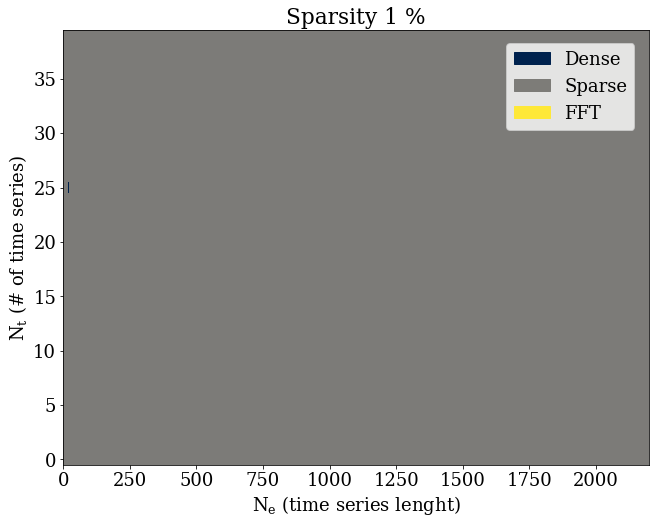

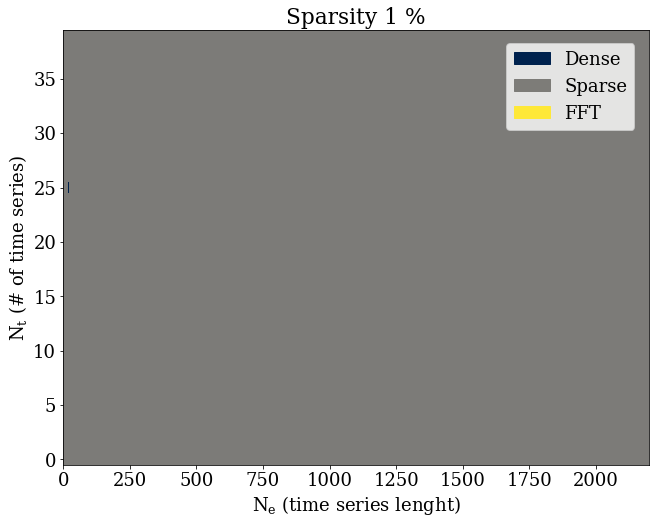

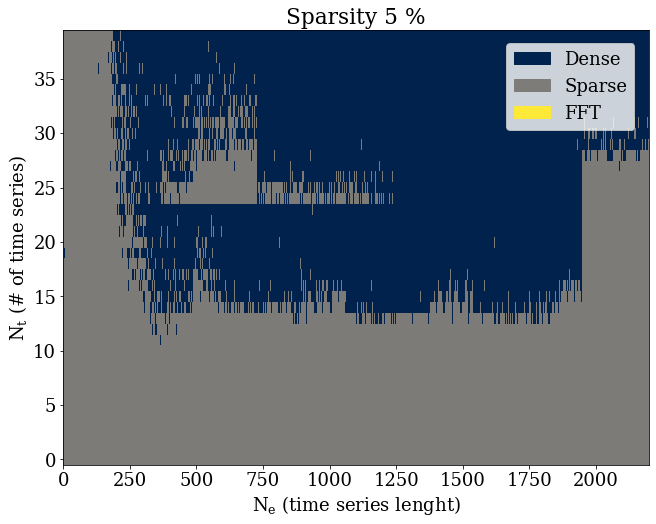

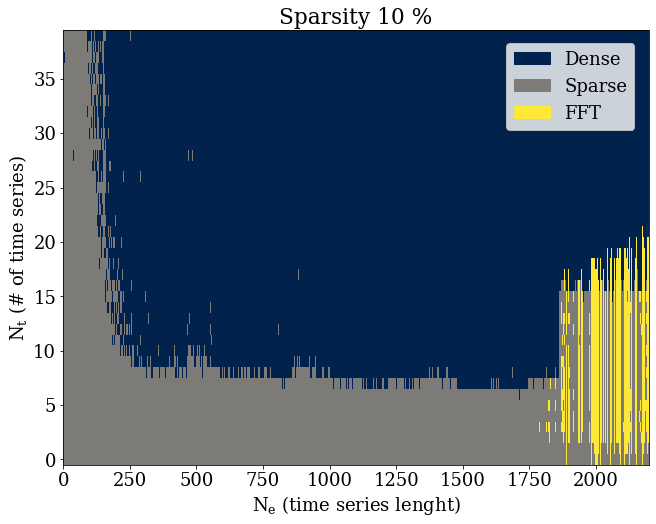

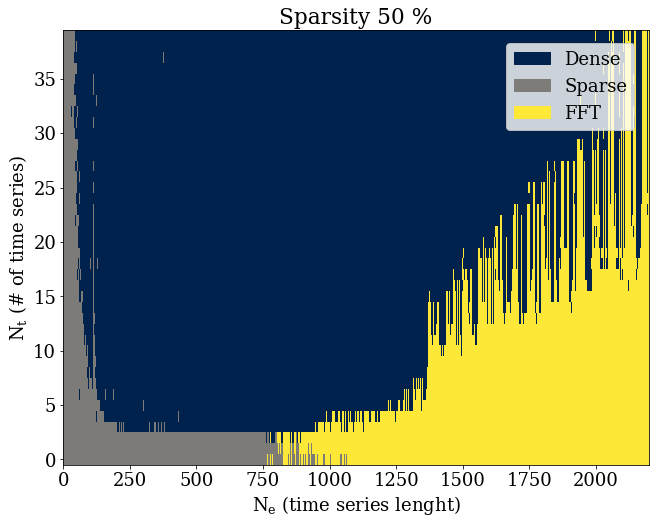

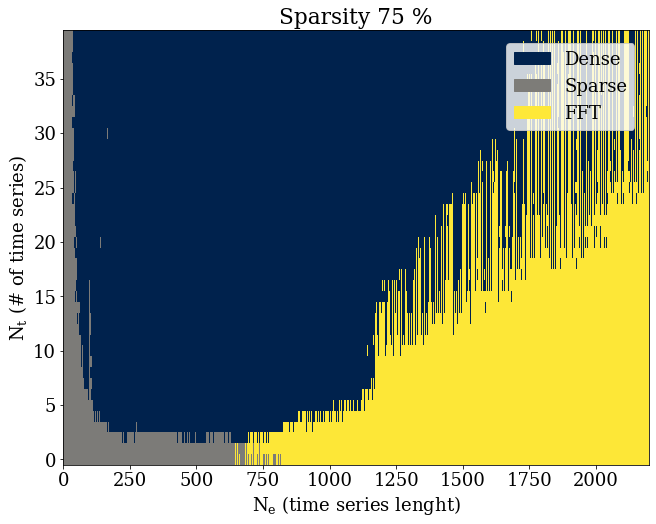

In [4]:
import matplotlib.pyplot as plt
import numpy as np
time_grid_dense = np.load("res2_time_grid_dense_20240108.npy")
time_grid_fft = np.load("res2_time_grid_fft_20240108.npy")
time_grid_sparse = np.load("res2_time_grid_sparse_20240108.npy")
import matplotlib.patches as mpatches
n_n_t = time_grid_dense.shape[0]
n_n_s = time_grid_dense.shape[1]
n_spars = time_grid_dense.shape[2]
r_s = 0
r_e = n_n_t
c_s = 0
c_e = n_n_s
time_grid_dense_avg = np.mean(time_grid_dense, 3)
time_grid_fft_avg = np.mean(time_grid_fft, 3)
time_grid_sparse_avg = np.mean(time_grid_sparse, 3)

for j in [0, 0, 1, 2, 3, 4]:
    time_grid_dense_slice = time_grid_dense_avg[:,:,j]
    time_grid_fft_slice = time_grid_fft_avg[:,:,j]
    time_grid_sparse_slice = time_grid_sparse_avg[:,:,j]
    time_grid = np.concatenate((time_grid_dense_slice[...,np.newaxis], time_grid_sparse_slice[...,np.newaxis], time_grid_fft_slice[...,np.newaxis]), axis=2)
    res = np.argmin(time_grid, axis=2).astype(float)/2

    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(10.5,8))
    im = plt.imshow(res[r_s:r_e,c_s:c_e], aspect='auto', origin="lower", cmap='cividis',  interpolation='nearest')
    plt.clim(0,1)
    # plt.colorbar()
    plt.xlabel('$\mathregular{N_e}$ (time series lenght)')
    plt.ylabel('$\mathregular{N_t}$ (# of time series)')
    colors = [ im.cmap(im.norm(value)) for value in [0, 0.5, 1]]
    # create a patch (proxy artist) for every color 
    labels = ['Dense', 'Sparse', 'FFT']
    patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=labels[i]) ) for i in [0, 1, 2] ]
    # put those patched as legend-handles into the legend
    plt.legend(handles=patches, bbox_to_anchor=(0.99, 0.99))
    plt.title(f"Sparsity {spars_vec[j]*100:.0f} %")
    plt.savefig(f'ragion_dense_fft_sparse_{j}.png', dpi=600)
    plt.show()